## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape[-1]

3072

In [9]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    X = keras.layers.Dense(units=512, activation='relu')(input_layer)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=256, activation='relu')(X)
    X = keras.layers.Dense(units=128, activation='relu')(X)
    X = keras.layers.Dense(units=64, activation='relu')(X)
    output = keras.layers.Dense(units=10, activation='softmax')(X)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[output])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total para

In [10]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [11]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.9626 - acc: 0.2790 - val_loss: 1.7899 - val_acc: 0.3591
Epoch 2/500
50000/50000 [==============================] - 15s 292us/step - loss: 1.7628 - acc: 0.3646 - val_loss: 1.6908 - val_acc: 0.3818
Epoch 3/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.6902 - acc: 0.3942 - val_loss: 1.6813 - val_acc: 0.3966
Epoch 4/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.6513 - acc: 0.4086 - val_loss: 1.5673 - val_acc: 0.4441
Epoch 5/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.6187 - acc: 0.4203 - val_loss: 1.6095 - val_acc: 0.4208
Epoch 6/500
50000/50000 [==============================] - 14s 286us/step - loss: 1.5824 - acc: 0.4330 - val_loss: 1.5215 - val_acc: 0.4606
Epoch 7/500
50000/50000 [==============================] - 15s 305us/step - loss: 1.5572 - acc: 0.4424 - val_l

Epoch 59/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.1100 - acc: 0.5990 - val_loss: 1.3646 - val_acc: 0.5271
Epoch 60/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.0960 - acc: 0.6041 - val_loss: 1.3263 - val_acc: 0.5358
Epoch 61/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.0904 - acc: 0.6056 - val_loss: 1.3753 - val_acc: 0.5200
Epoch 62/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.0966 - acc: 0.6044 - val_loss: 1.3546 - val_acc: 0.5298
Epoch 63/500
50000/50000 [==============================] - 14s 279us/step - loss: 1.0956 - acc: 0.6050 - val_loss: 1.3440 - val_acc: 0.5274
Epoch 64/500
50000/50000 [==============================] - 14s 282us/step - loss: 1.0912 - acc: 0.6069 - val_loss: 1.3659 - val_acc: 0.5227
Epoch 65/500
50000/50000 [==============================] - 14s 281us/step - loss: 1.0769 - acc: 0.6119 - val_loss: 1.3715 - val_acc: 0.5228
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.9302 - acc: 0.6650 - val_loss: 1.4015 - val_acc: 0.5321
Epoch 118/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.9261 - acc: 0.6674 - val_loss: 1.4147 - val_acc: 0.5307
Epoch 119/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.9286 - acc: 0.6646 - val_loss: 1.4381 - val_acc: 0.5325
Epoch 120/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.9239 - acc: 0.6687 - val_loss: 1.4206 - val_acc: 0.5300
Epoch 121/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.9227 - acc: 0.6688 - val_loss: 1.4595 - val_acc: 0.5208
Epoch 122/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.9186 - acc: 0.6698 - val_loss: 1.4325 - val_acc: 0.5301
Epoch 123/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.9173 - acc: 0.6697 - val_loss: 1.4540 - val_acc: 0.5321
Epoch 

Epoch 175/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.8438 - acc: 0.6973 - val_loss: 1.4942 - val_acc: 0.5282
Epoch 176/500
50000/50000 [==============================] - 15s 292us/step - loss: 0.8436 - acc: 0.6985 - val_loss: 1.4932 - val_acc: 0.5310
Epoch 177/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.8436 - acc: 0.6988 - val_loss: 1.5091 - val_acc: 0.5277
Epoch 178/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.8424 - acc: 0.6997 - val_loss: 1.4677 - val_acc: 0.5330
Epoch 179/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.8247 - acc: 0.7040 - val_loss: 1.4911 - val_acc: 0.5288
Epoch 180/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.8359 - acc: 0.7010 - val_loss: 1.4937 - val_acc: 0.5276
Epoch 181/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.8214 - acc: 0.7034 - val_loss: 1.4821 - val_acc: 0.5291
Epoch 

Epoch 233/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.7682 - acc: 0.7270 - val_loss: 1.5618 - val_acc: 0.5280
Epoch 234/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.7783 - acc: 0.7235 - val_loss: 1.5804 - val_acc: 0.5280
Epoch 235/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.7726 - acc: 0.7266 - val_loss: 1.5442 - val_acc: 0.5201
Epoch 236/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.7699 - acc: 0.7245 - val_loss: 1.5470 - val_acc: 0.5294
Epoch 237/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.7713 - acc: 0.7242 - val_loss: 1.5831 - val_acc: 0.5235
Epoch 238/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.7765 - acc: 0.7221 - val_loss: 1.5442 - val_acc: 0.5322
Epoch 239/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.7679 - acc: 0.7254 - val_loss: 1.5547 - val_acc: 0.5307
Epoch 

Epoch 291/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.7303 - acc: 0.7410 - val_loss: 1.6271 - val_acc: 0.5250
Epoch 292/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.7275 - acc: 0.7402 - val_loss: 1.6131 - val_acc: 0.5250
Epoch 293/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.7301 - acc: 0.7402 - val_loss: 1.5993 - val_acc: 0.5272
Epoch 294/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.7173 - acc: 0.7458 - val_loss: 1.5957 - val_acc: 0.5259
Epoch 295/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.7279 - acc: 0.7404 - val_loss: 1.6052 - val_acc: 0.5243
Epoch 296/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.7332 - acc: 0.7380 - val_loss: 1.6021 - val_acc: 0.5283
Epoch 297/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.7234 - acc: 0.7418 - val_loss: 1.5950 - val_acc: 0.5272
Epoch 

Epoch 349/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.7011 - acc: 0.7518 - val_loss: 1.6406 - val_acc: 0.5295
Epoch 350/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.6864 - acc: 0.7559 - val_loss: 1.6688 - val_acc: 0.5189
Epoch 351/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.6925 - acc: 0.7566 - val_loss: 1.6432 - val_acc: 0.5257
Epoch 352/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.6914 - acc: 0.7549 - val_loss: 1.6677 - val_acc: 0.5254
Epoch 353/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.6865 - acc: 0.7563 - val_loss: 1.6835 - val_acc: 0.5192
Epoch 354/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.6991 - acc: 0.7518 - val_loss: 1.6480 - val_acc: 0.5250
Epoch 355/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.6989 - acc: 0.7528 - val_loss: 1.6241 - val_acc: 0.5246
Epoch 

Epoch 407/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.6703 - acc: 0.7622 - val_loss: 1.6985 - val_acc: 0.5208
Epoch 408/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.6712 - acc: 0.7627 - val_loss: 1.6727 - val_acc: 0.5289
Epoch 409/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.6673 - acc: 0.7635 - val_loss: 1.7185 - val_acc: 0.5307
Epoch 410/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.6664 - acc: 0.7642 - val_loss: 1.6991 - val_acc: 0.5273
Epoch 411/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.6648 - acc: 0.7649 - val_loss: 1.6988 - val_acc: 0.5211
Epoch 412/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.6724 - acc: 0.7630 - val_loss: 1.6974 - val_acc: 0.5225
Epoch 413/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.6670 - acc: 0.7665 - val_loss: 1.6661 - val_acc: 0.5308
Epoch 

Epoch 465/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.6485 - acc: 0.7722 - val_loss: 1.7029 - val_acc: 0.5302
Epoch 466/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.6535 - acc: 0.7717 - val_loss: 1.6938 - val_acc: 0.5256
Epoch 467/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.6370 - acc: 0.7758 - val_loss: 1.7107 - val_acc: 0.5241
Epoch 468/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.6402 - acc: 0.7752 - val_loss: 1.7617 - val_acc: 0.5160
Epoch 469/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.6440 - acc: 0.7739 - val_loss: 1.7324 - val_acc: 0.5230
Epoch 470/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.6423 - acc: 0.7730 - val_loss: 1.7150 - val_acc: 0.5247
Epoch 471/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.6367 - acc: 0.7773 - val_loss: 1.7173 - val_acc: 0.5228
Epoch 

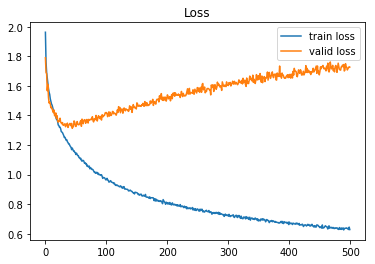

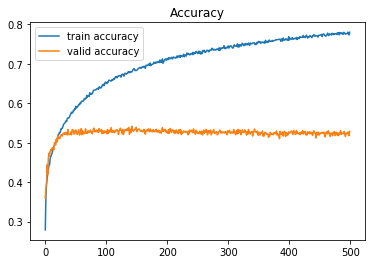

In [13]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()